<a href="https://colab.research.google.com/github/vikgenix/Capstone_Project/blob/main/Diabetes_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


#Loading the Dataset

In [ ]:
df=pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_dataset.csv')
df

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


#EDA (Python + Pandas)

###Unique Values

In [ ]:
df.nunique()

,0
age,73
gender,3
ethnicity,5
education_level,4
income_level,5
employment_status,4
smoking_status,3
alcohol_consumption_per_week,11
physical_activity_minutes_per_week,620
diet_score,101


###First 5 rows

In [ ]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


###Missing Values

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


###Duplicated Rows

In [ ]:
df.duplicated().sum()

np.int64(0)


###Shape of Dataset

In [ ]:
df.shape

(100000, 31)

###Describe Data

In [ ]:
df.describe(include='all')

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
count,100000.00000,100000,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
unique,NaN,3,5,4,5,4,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Female,White,Highschool,Middle,Employed,Never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Type 2,NaN
freq,NaN,50216,44997,44891,35152,60175,59813,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59774,NaN
mean,50.12041,NaN,NaN,NaN,NaN,NaN,NaN,2.003670,118.911640,5.994787,...,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,NaN,0.599980
std,15.60460,NaN,NaN,NaN,NaN,NaN,NaN,1.417779,84.409662,1.780954,...,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,NaN,0.489904
min,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,NaN,0.000000
25%,39.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,57.000000,4.800000,...,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,NaN,0.000000
50%,50.00000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,100.000000,6.000000,...,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,NaN,1.000000
75%,61.00000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,160.000000,7.200000,...,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,NaN,1.000000


###Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

# Visualise the Numerical Columns


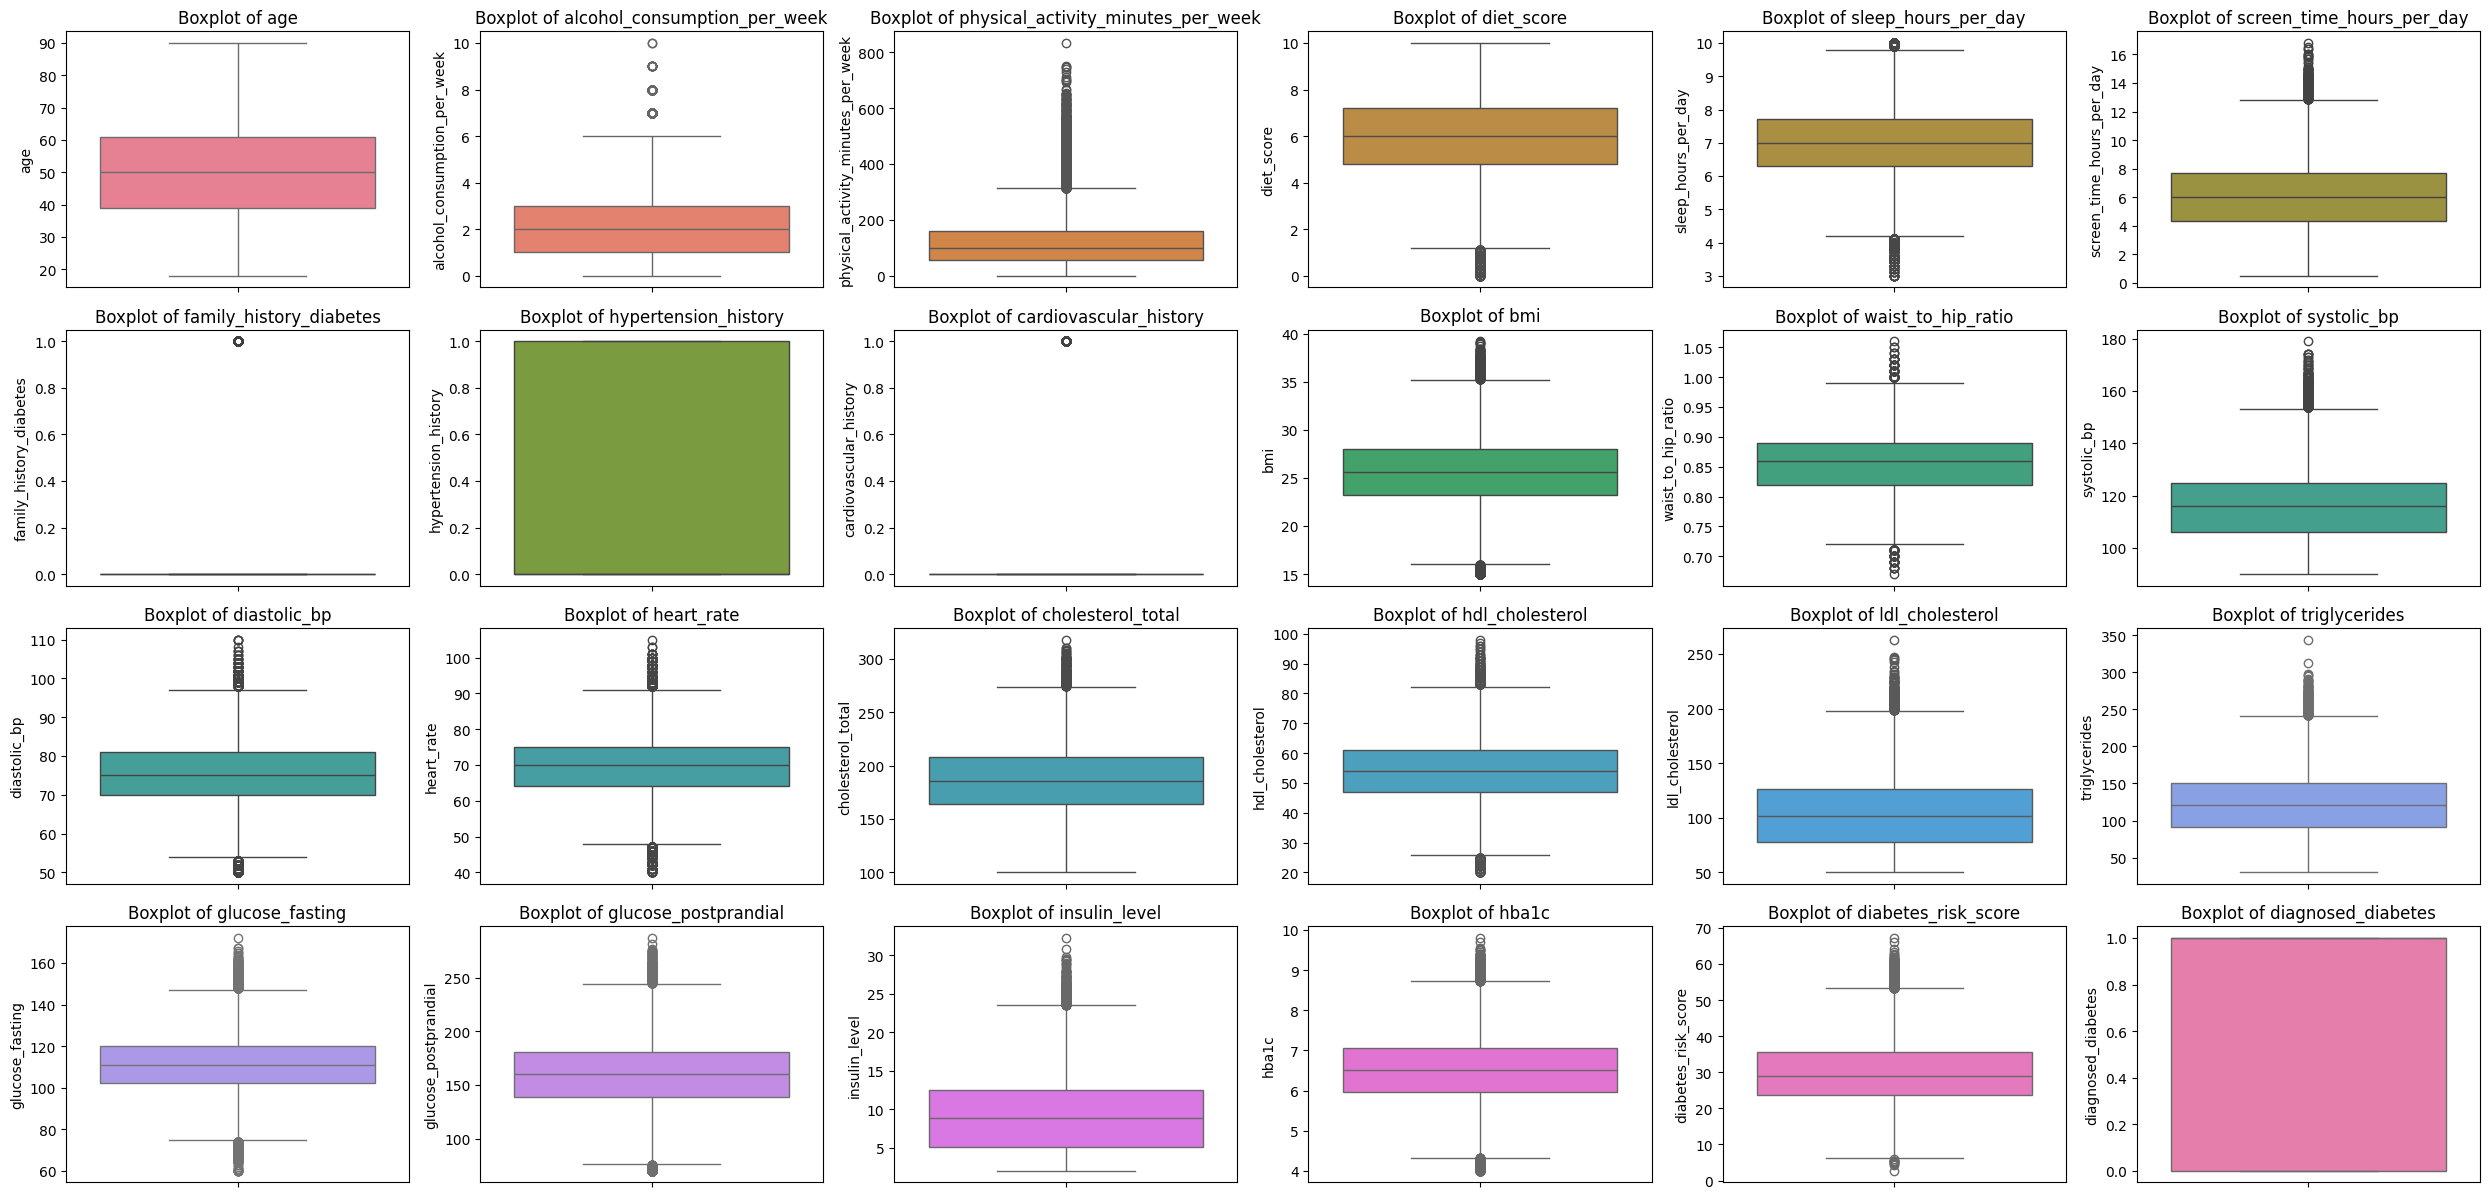

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
palette = sns.color_palette("husl", len(numerical_cols))
plt.figure(figsize=(25, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Visualize the Categorical Column

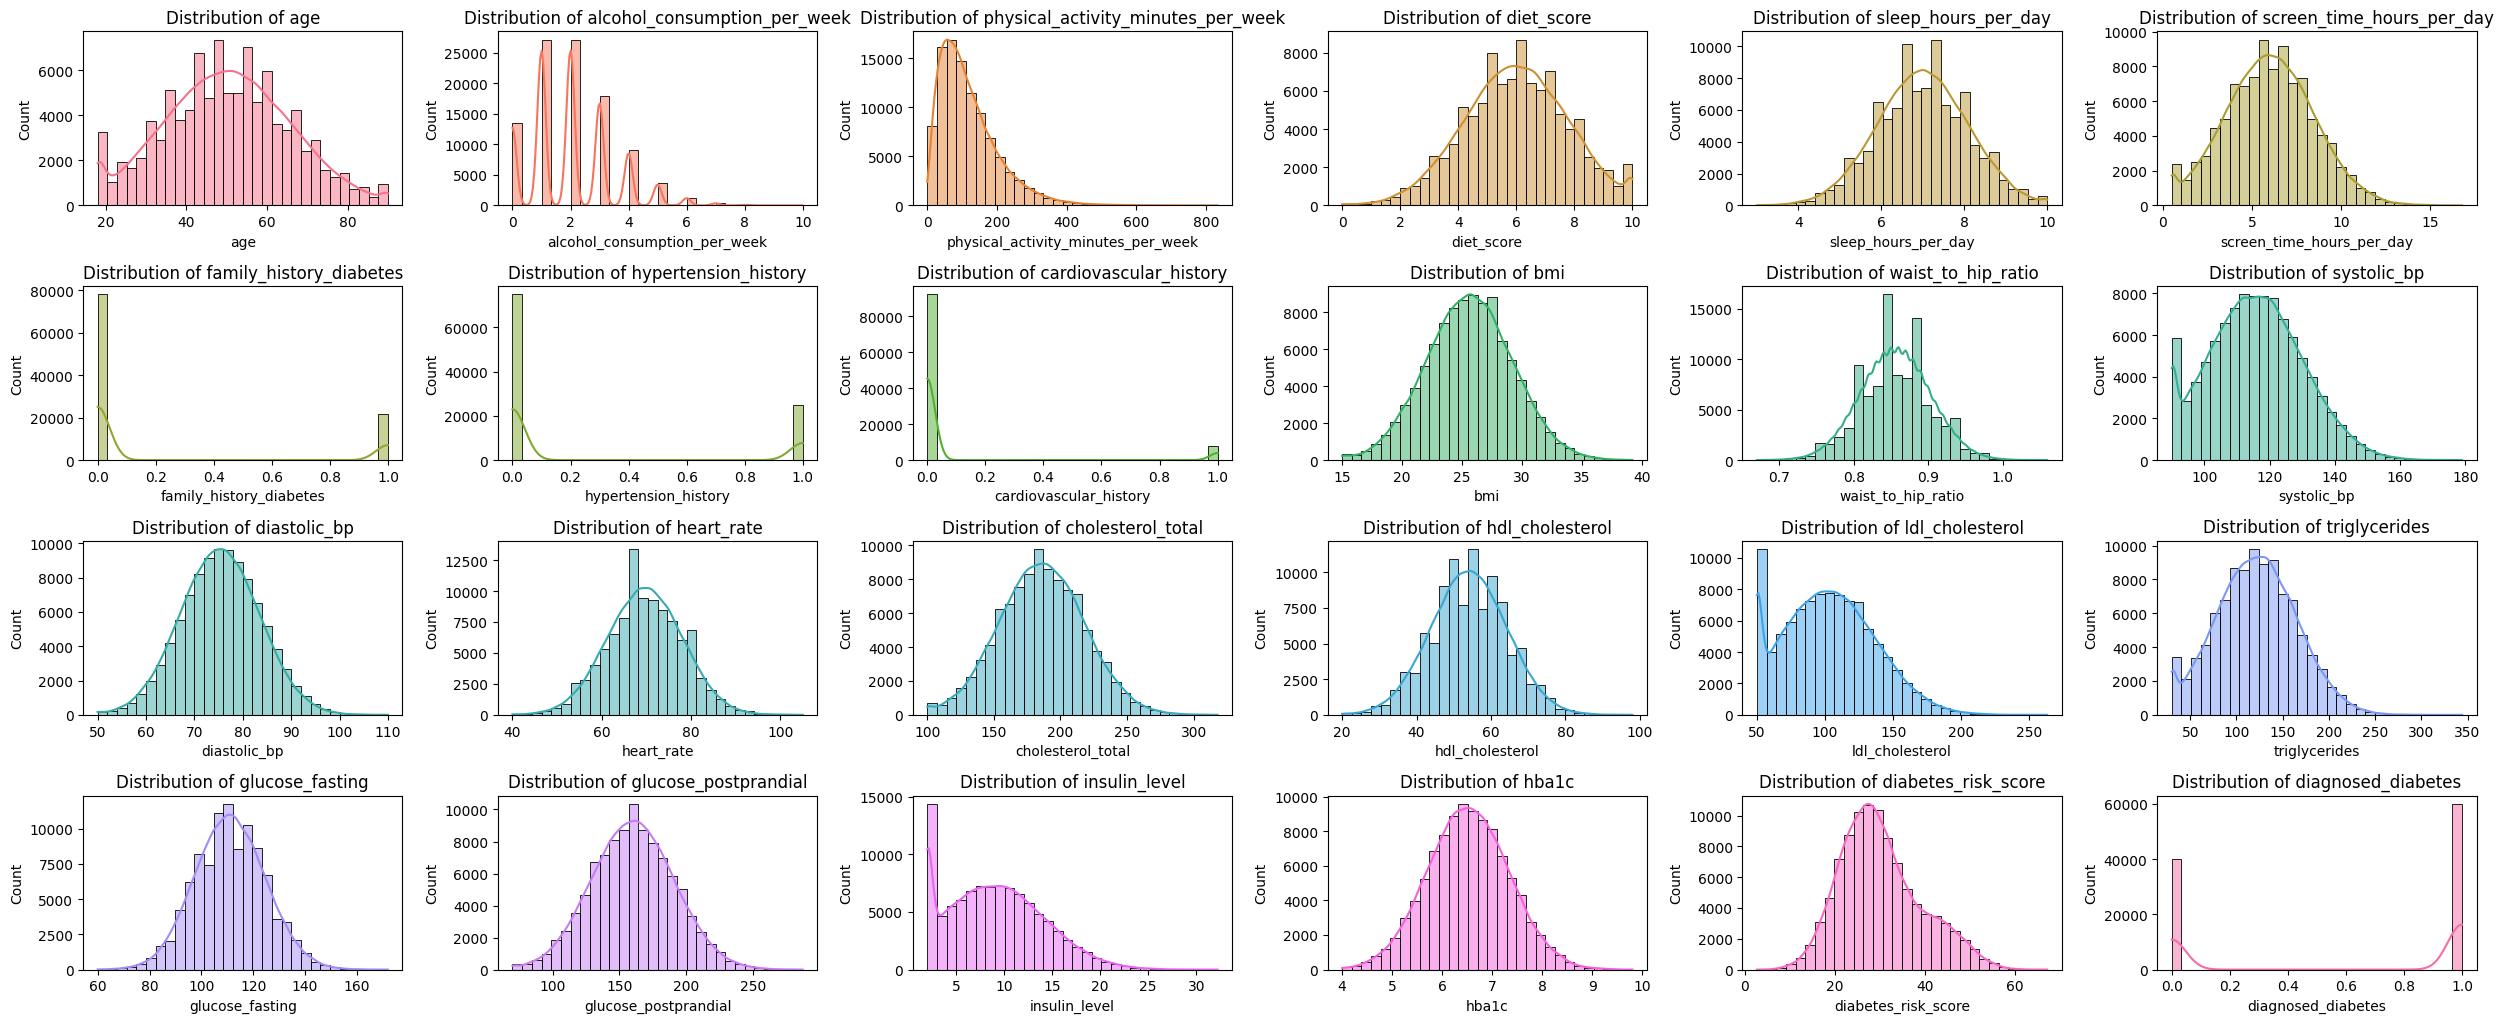

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

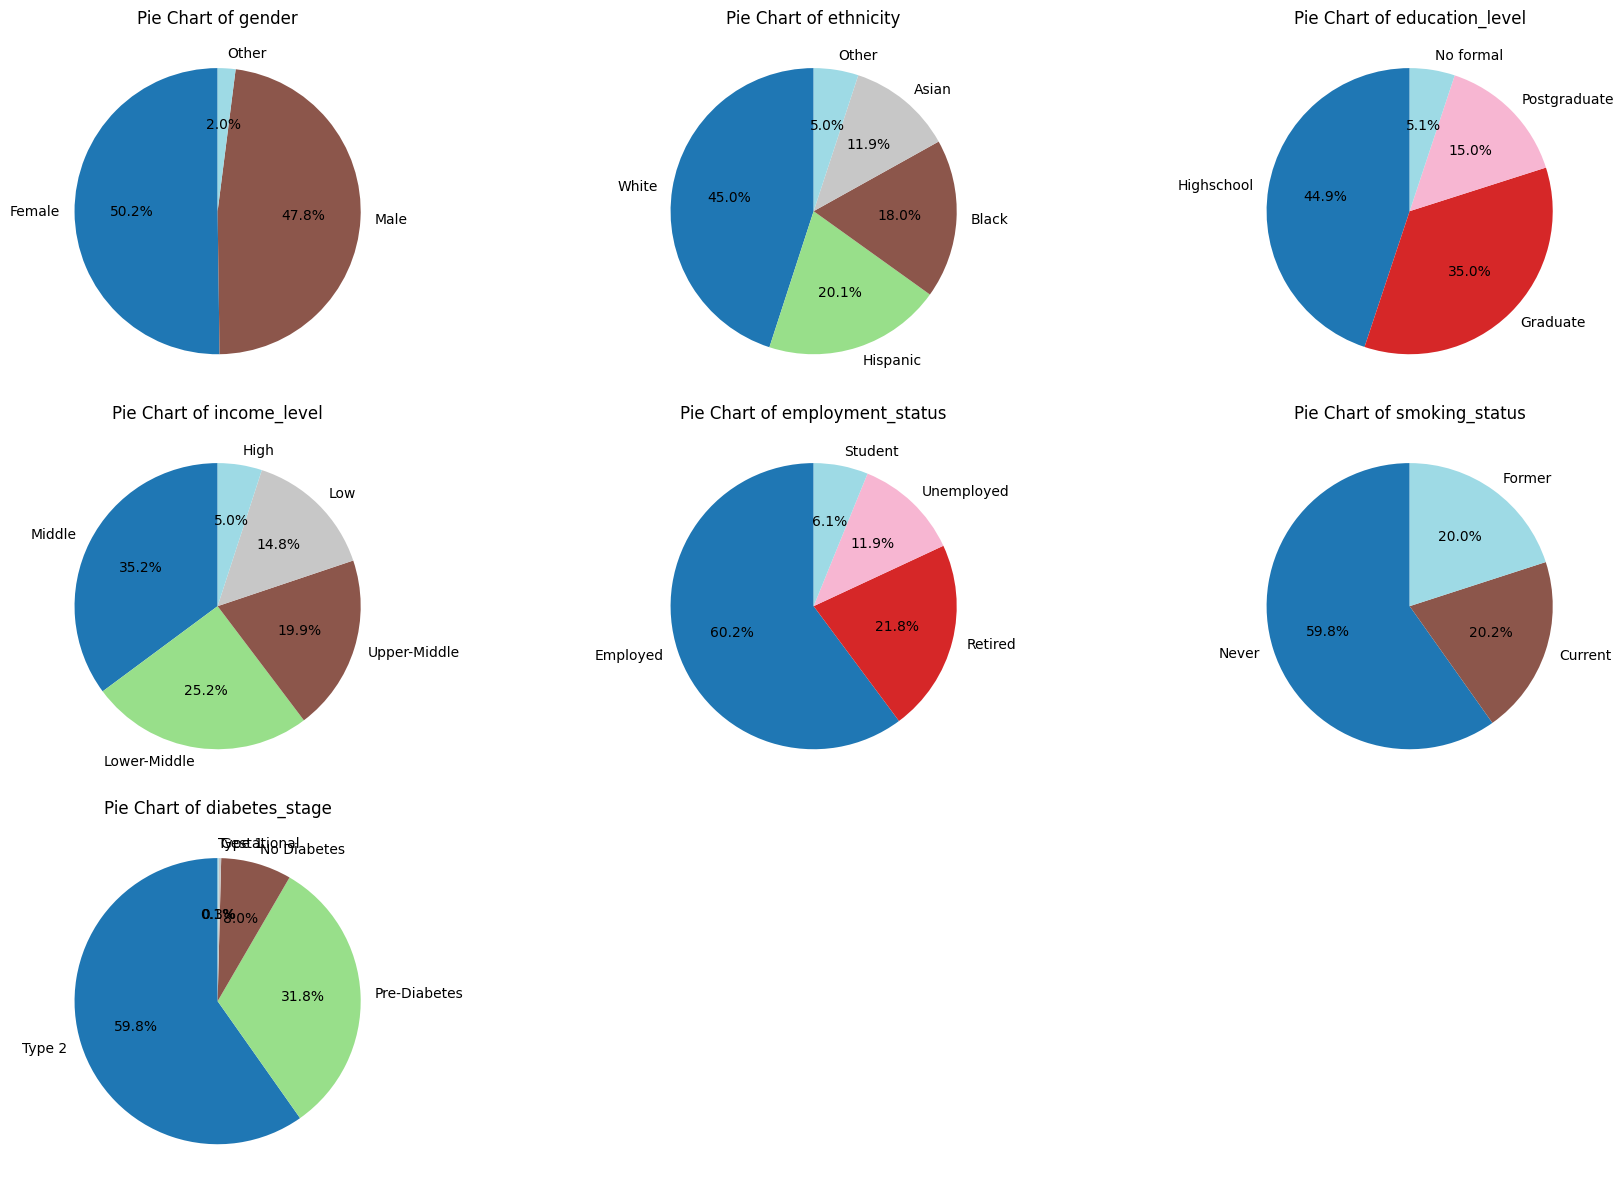

In [ ]:
plt.tight_layout()
plt.show()
if len(categorical_cols) > 0:
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(3, 3, i)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
        plt.title(f'Pie Chart of {col}')
        plt.ylabel('')
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

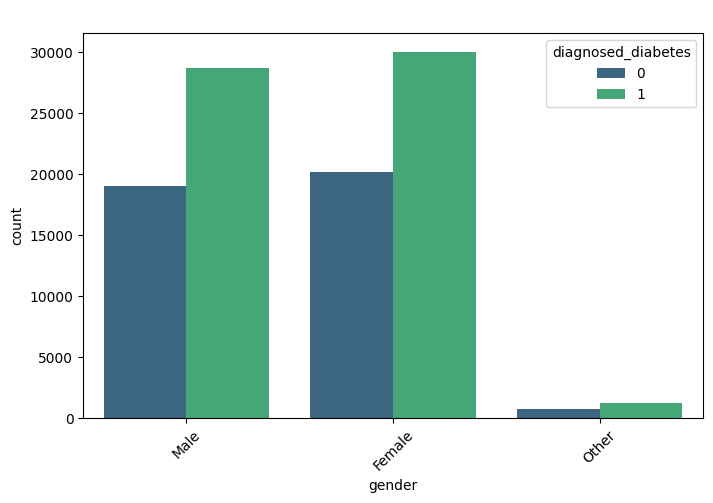

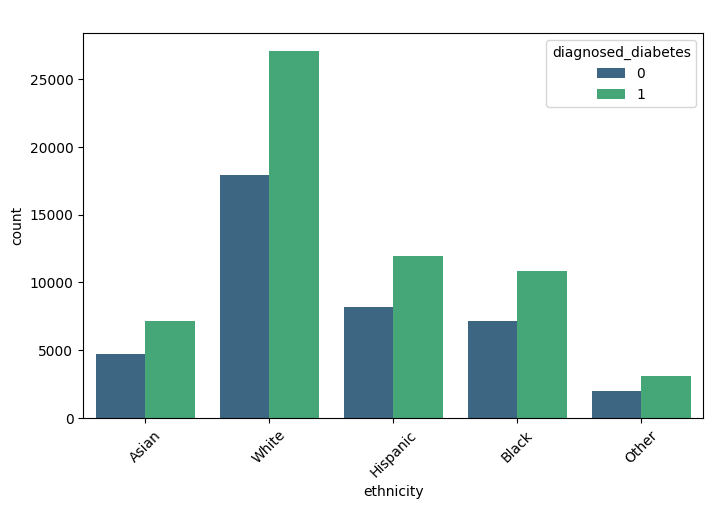

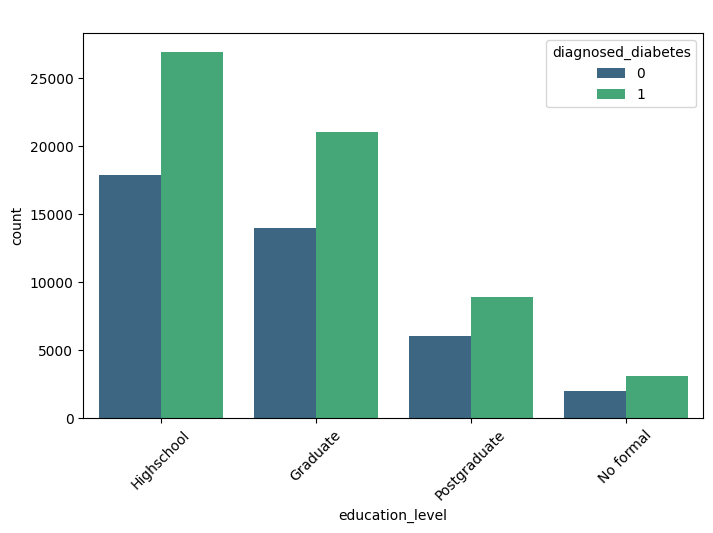

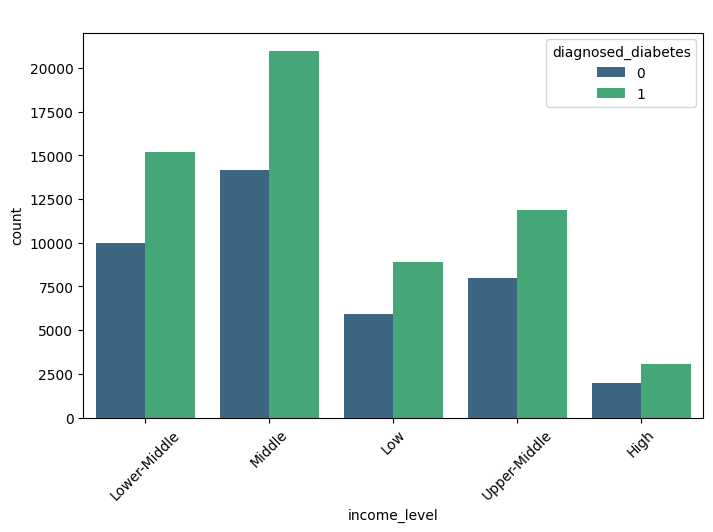

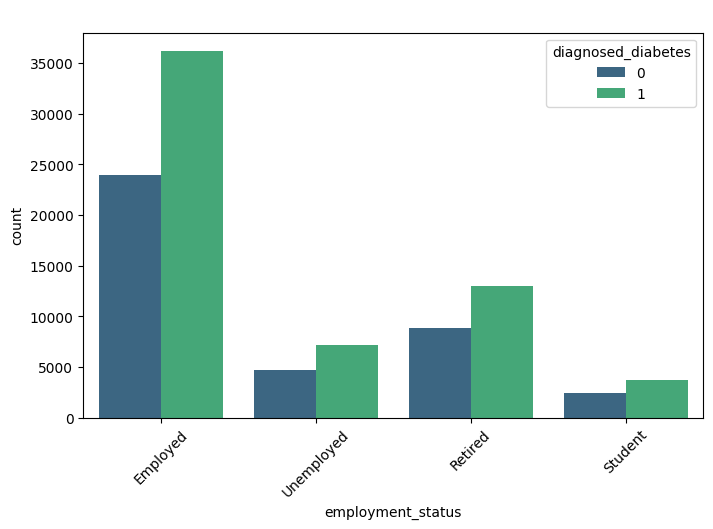

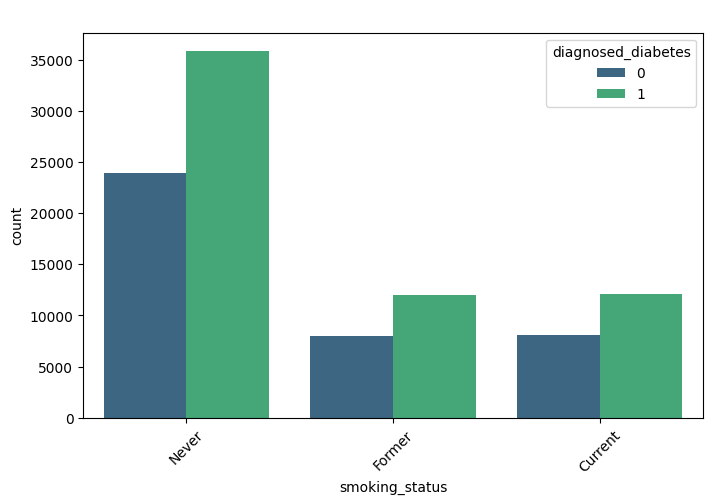

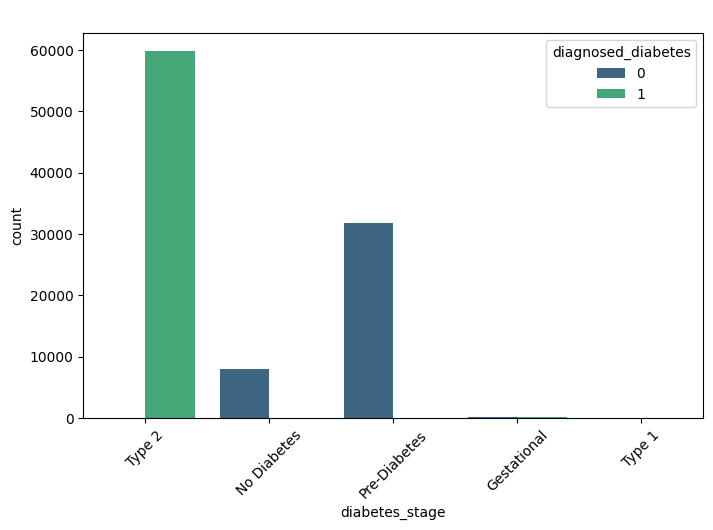

In [ ]:
plt.tight_layout()
plt.show()
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue="diagnosed_diabetes", palette="viridis")
    plt.title(f"{col} vs diagnosed_diabetes", fontsize=14, color="w")
    plt.xticks(rotation=45)
    plt.show()

#Data Pre-Processing

In [ ]:
df=df.drop(columns=['ethnicity','education_level','employment_status','income_level'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
features = df.drop(['diabetes_stage'], axis=1)
features = features.copy()
features.head()

,age,gender,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
0,58,1,2,0,215,5.7,7.9,7.9,0,0,...,239,41,160,145,136,236,6.36,8.18,29.6,1
1,48,0,1,1,143,6.7,6.5,8.7,0,0,...,116,55,50,30,93,150,2.00,5.63,23.0,0
2,60,1,2,1,57,6.4,10.0,8.1,1,0,...,213,66,99,36,118,195,5.07,7.51,44.7,1
3,74,0,2,0,49,3.4,6.6,5.2,0,0,...,171,50,79,140,139,253,5.28,9.03,38.2,1
4,46,1,2,1,109,7.2,7.4,5.0,0,0,...,210,52,125,160,137,184,12.74,7.20,23.5,1


In [ ]:
from sklearn.model_selection import train_test_split
X = features.iloc[:, :-2]
y = features.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.head()

,diabetes_risk_score,diagnosed_diabetes
75220,29.9,0
48955,25.8,0
44966,26.6,1
13568,21.3,0
92727,35.4,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Select 'diabetes_risk_score' as the target variable
y_train_risk_score = y_train['diabetes_risk_score']
y_test_risk_score = y_test['diabetes_risk_score']

# Initialize and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train_risk_score)

# Make predictions on the test set
y_pred_risk_score = dt_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test_risk_score, y_pred_risk_score)
mse = mean_squared_error(y_test_risk_score, y_pred_risk_score)
mae = mean_absolute_error(y_test_risk_score, y_pred_risk_score)

print(f"Decision Tree Regressor - Diabetes Risk Score Prediction")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Decision Tree Regressor - Diabetes Risk Score Prediction
R-squared: 0.9695
Mean Squared Error: 2.5154
Mean Absolute Error: 1.2381


### Predicted vs. Actual Diabetes Risk Scores Visualization

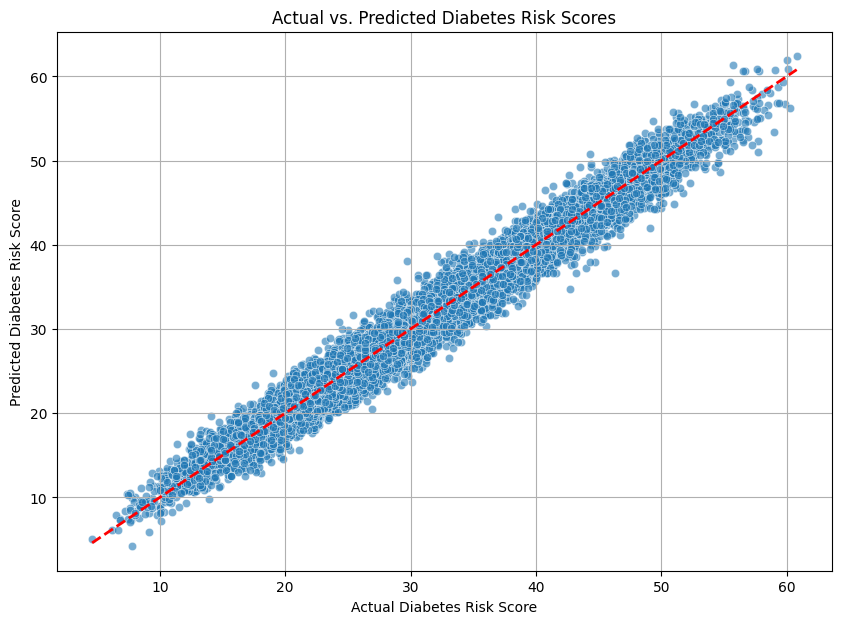

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test_risk_score, y=y_pred_risk_score, alpha=0.6)
plt.plot([y_test_risk_score.min(), y_test_risk_score.max()], [y_test_risk_score.min(), y_test_risk_score.max()], 'r--', lw=2)
plt.xlabel('Actual Diabetes Risk Score')
plt.ylabel('Predicted Diabetes Risk Score')
plt.title('Actual vs. Predicted Diabetes Risk Scores')
plt.grid(True)
plt.show()

In [ ]:
print("Actual Diabetes Risk Scores (first 5):")
print(y_test_risk_score.head())

print("\nPredicted Diabetes Risk Scores (first 5):")
y_pred_risk_score_series = pd.Series(y_pred_risk_score, index=y_test_risk_score.index)
print(y_pred_risk_score_series.head())

Actual Diabetes Risk Scores (first 5):
75721    29.2
80184    50.8
19864    29.5
76699    34.2
92991    31.2
Name: diabetes_risk_score, dtype: float64

Predicted Diabetes Risk Scores (first 5):
75721    29.9
80184    49.3
19864    30.9
76699    32.0
92991    31.7
dtype: float64


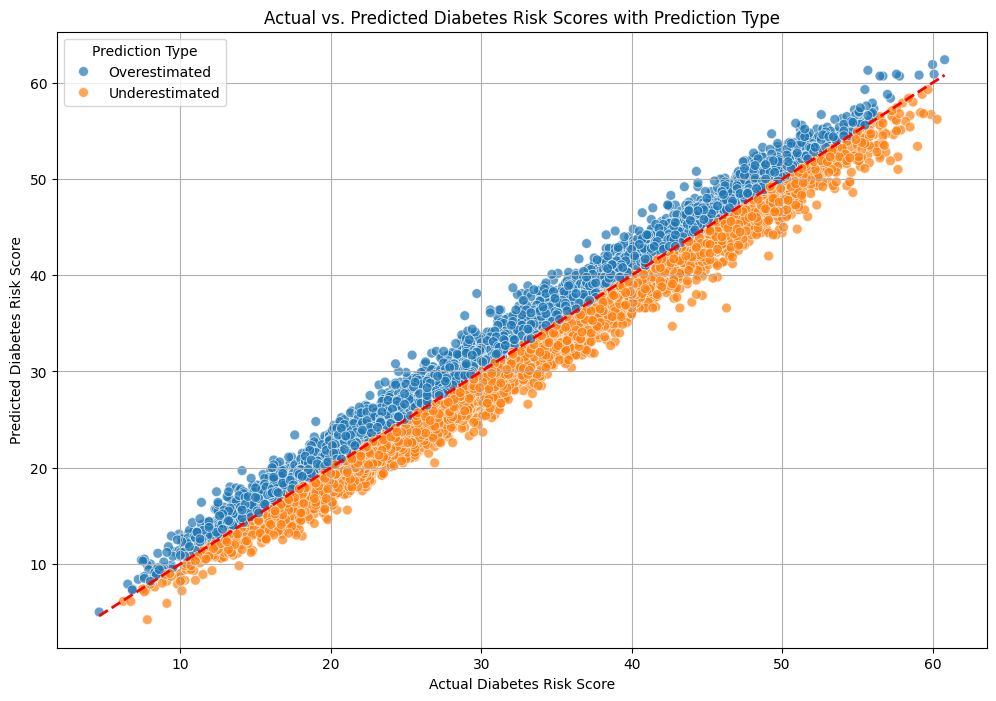

In [ ]:
plt.figure(figsize=(12, 8))

# Create a temporary DataFrame for plotting to easily add a hue column
plot_df = pd.DataFrame({
    'Actual': y_test_risk_score,
    'Predicted': y_pred_risk_score
})
plot_df['Prediction Type'] = np.where(plot_df['Predicted'] > plot_df['Actual'], 'Overestimated', 'Underestimated')

sns.scatterplot(x='Actual', y='Predicted', hue='Prediction Type', data=plot_df, alpha=0.7, s=50)
plt.plot([plot_df['Actual'].min(), plot_df['Actual'].max()], [plot_df['Actual'].min(), plot_df['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual Diabetes Risk Score')
plt.ylabel('Predicted Diabetes Risk Score')
plt.title('Actual vs. Predicted Diabetes Risk Scores with Prediction Type')
plt.grid(True)
plt.show()

## Standardize Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features (X_train)
scaler.fit(X_train)

# Transform both the training features (X_train) and testing features (X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized successfully.")

Features standardized successfully.


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train_risk_score)

# Make predictions on the scaled test set
y_pred_linear_risk_score = linear_regressor.predict(X_test_scaled)

print("Linear Regression model trained and predictions made.")

Linear Regression model trained and predictions made.


**Reasoning**:
I need to evaluate the performance of the Linear Regression model using R-squared, Mean Squared Error, and Mean Absolute Error to understand its accuracy in predicting 'diabetes_risk_score'.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the Linear Regression model
r2_linear = r2_score(y_test_risk_score, y_pred_linear_risk_score)
mse_linear = mean_squared_error(y_test_risk_score, y_pred_linear_risk_score)
mae_linear = mean_absolute_error(y_test_risk_score, y_pred_linear_risk_score)

print(f"Linear Regression - Diabetes Risk Score Prediction")
print(f"R-squared: {r2_linear:.4f}")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"Mean Absolute Error: {mae_linear:.4f}")

Linear Regression - Diabetes Risk Score Prediction
R-squared: 0.9933
Mean Squared Error: 0.5544
Mean Absolute Error: 0.4391


### Cross-Validation for Linear Regression Model

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regressor_cv = LinearRegression()

# Define the cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for R-squared
r2_scores_cv = cross_val_score(linear_regressor_cv, X_train_scaled, y_train_risk_score, cv=kf, scoring='r2')
print(f"Cross-validated R-squared: {r2_scores_cv.mean():.4f} (+/- {r2_scores_cv.std():.4f})")

# Perform cross-validation for Mean Squared Error (negated because cross_val_score minimizes by default)
mse_scores_cv = -cross_val_score(linear_regressor_cv, X_train_scaled, y_train_risk_score, cv=kf, scoring='neg_mean_squared_error')
print(f"Cross-validated Mean Squared Error: {mse_scores_cv.mean():.4f} (+/- {mse_scores_cv.std():.4f})")

# Perform cross-validation for Mean Absolute Error (negated)
mae_scores_cv = -cross_val_score(linear_regressor_cv, X_train_scaled, y_train_risk_score, cv=kf, scoring='neg_mean_absolute_error')
print(f"Cross-validated Mean Absolute Error: {mae_scores_cv.mean():.4f} (+/- {mae_scores_cv.std():.4f})")

Cross-validated R-squared: 0.9935 (+/- 0.0002)
Cross-validated Mean Squared Error: 0.5297 (+/- 0.0203)
Cross-validated Mean Absolute Error: 0.4326 (+/- 0.0032)
